# 1. Import lib

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report, roc_curve,roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

# 2.Problem Statement

In [ ]:
Prediction Of  Heart Patient By Using DT.

In [ ]:
IV:-
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'
        
DV:-
    'target'

# 3. Data Gathering

In [2]:
df = pd.read_csv(r"F:\VELOCITY\PROJECTS\Heart_DT\Heart_DT\project_app\heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='target', ylabel='count'>

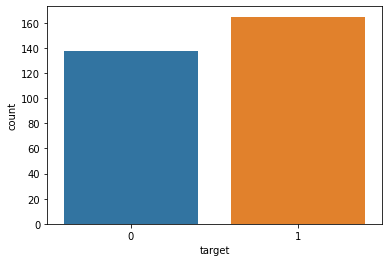

In [5]:
sns.countplot(x =df['target'])

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# 4. Feature Selection

In [7]:
df = df.select_dtypes(exclude=object)
x = df.drop('target',axis = 1)
y = df['target']

In [8]:
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# 5. model training

In [10]:
# Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
43    53    0   0       130   264    0        0      143      0      0.4   
268   54    1   0       122   286    0        0      116      1      3.2   
162   41    1   1       120   157    0        1      182      0      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
122   41    0   2       112   268    0        0      172      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
161   55    0   1       132   342    0        1      166      0      1.2   
263   63    0   0       108   269    0        1      169      1      1.8   
67    45    0   1       130   234    0        0      175      0      0.6   
59    57    0   0       128   303    0        0      159      0      0.0   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
43       1   0     2  
268      1   2     2  
162      2   0     2  
249      1   3     3  
122      2   0     2  
..     ...  ..   ...  
161      2   0     2  
263      1   2     2  
67       1   0     2  
59       2   1     2  
102      2   2     2  

[227 rows x 13 columns]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
y_train

43     1
268    0
162    1
249    0
122    1
      ..
161    1
263    0
67     1
59     1
102    1
Name: target, Length: 227, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
x_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
229   64    1   2       125   309    0        1      131      1      1.8   
92    52    1   2       138   223    0        1      169      0      0.0   
39    65    0   2       160   360    0        0      151      0      0.8   
187   54    1   0       124   266    0        0      109      1      2.2   
168   63    1   0       130   254    0        0      147      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
197   67    1   0       125   254    1        1      163      0      0.2   
51    66    1   0       120   302    0        0      151      0      0.4   
106   69    1   3       160   234    1        0      131      0      0.1   
21    44    1   2       130   233    0        1      179      1      0.4   
205   52    1   0       128   255    0        1      161      1      0.0   

     slope  ca  thal  
229      1   0     3  
92       2   4     2  
39       2   0     2  
187      1   1     3  
168      1   1     3  
..     ...  ..   ...  
197      1   2     3  
51       1   0     2  
106      1   1     2  
21       2   0     2  
205      2   1     3  

[76 rows x 13 columns]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
y_test

229    0
92     1
39     1
187    0
168    0
      ..
197    0
51     1
106    1
21     1
205    0
Name: target, Length: 76, dtype: int64

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [15]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

# 6.Model Evaluation

In [17]:
# Metrics Evaluation

In [16]:
# test data Evaluation

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[27  8]
 [ 7 34]]
Accuracy : 0.8026315789473685
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.81      0.83      0.82        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [17]:
# train data Evaluation

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[103   0]
 [  0 124]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



# 7. Plot Decision Tree

In [18]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_Without_HYP.png')

# 8. Hyperparameter Tuning

In [19]:
dt_model = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf = GridSearchCV(dt_model,hyperparameters, cv = 5)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [20]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [21]:
# Training Data Evaluation After Hyperparameter Tuning

dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 82  21]
 [ 15 109]]
********************************************************************************
Accuracy : 0.8414096916299559
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       103
           1       0.84      0.88      0.86       124

    accuracy                           0.84       227
   macro avg       0.84      0.84      0.84       227
weighted avg       0.84      0.84      0.84       227



In [22]:
## Testing Data Evaluation After Hyperparameter Tuning

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[23 12]
 [ 9 32]]
********************************************************************************
Accuracy : 0.7236842105263158
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        35
           1       0.73      0.78      0.75        41

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



In [23]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_With_HYP.png')

# 9. Pruning

In [23]:
decision_tree_model = DecisionTreeClassifier(random_state=29)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=29)

In [24]:
# test data

y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[28  7]
 [ 7 34]]
Accuracy : 0.8157894736842105
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.83      0.83      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [25]:
# train data

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[103   0]
 [  0 124]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



## Cost Complexity Pruning Path

In [26]:
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00391581, 0.00427379, 0.00533974, 0.00587372,
       0.00587372, 0.00587372, 0.0062653 , 0.00629327, 0.00685267,
       0.00696488, 0.00720865, 0.00792952, 0.0082232 , 0.0094399 ,
       0.0102523 , 0.01189427, 0.01199217, 0.01284875, 0.01453744,
       0.01924341, 0.01998955, 0.02055541, 0.02176052, 0.02177162,
       0.05022126, 0.12468917])

In [27]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(random_state=29,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
train_accuracy_list

[1.0,
 0.9955947136563876,
 0.986784140969163,
 0.9779735682819384,
 0.9691629955947136,
 0.9691629955947136,
 0.960352422907489,
 0.9559471365638766,
 0.947136563876652,
 0.9383259911894273,
 0.933920704845815,
 0.9251101321585903,
 0.920704845814978,
 0.9162995594713657,
 0.9030837004405287,
 0.8898678414096917,
 0.8810572687224669,
 0.8590308370044053,
 0.8590308370044053,
 0.8325991189427313,
 0.8325991189427313,
 0.8325991189427313,
 0.8149779735682819,
 0.8149779735682819,
 0.788546255506608,
 0.7533039647577092,
 0.5462555066079295]

In [28]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(random_state=29,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
test_accuracy_list

[0.8157894736842105,
 0.8157894736842105,
 0.8157894736842105,
 0.8157894736842105,
 0.8026315789473685,
 0.8026315789473685,
 0.7894736842105263,
 0.7894736842105263,
 0.7631578947368421,
 0.7631578947368421,
 0.7631578947368421,
 0.7631578947368421,
 0.7894736842105263,
 0.7894736842105263,
 0.7763157894736842,
 0.7631578947368421,
 0.75,
 0.7236842105263158,
 0.7236842105263158,
 0.7105263157894737,
 0.7105263157894737,
 0.7105263157894737,
 0.7105263157894737,
 0.7105263157894737,
 0.6973684210526315,
 0.7236842105263158,
 0.5394736842105263]

In [29]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([0, 1, 2, 3], dtype=int64),)

In [30]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(random_state=29,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
test_accuracy_list[3]

0.8157894736842105

In [31]:
ccp_alpha_list[3]

0.005339741022560406

In [32]:
np.where(train_accuracy_list == np.max(train_accuracy_list))

(array([0], dtype=int64),)

In [33]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(random_state=29,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
train_accuracy_list[0]

1.0

In [34]:
ccp_alpha_list[0]

0.0

In [35]:
test_accuracy_list[3]

0.8157894736842105

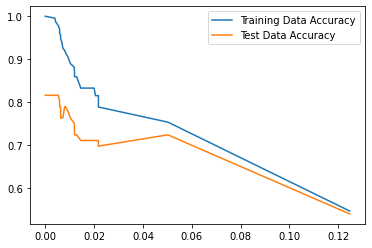

In [36]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [37]:
decision_tree_model = DecisionTreeClassifier(random_state=29,ccp_alpha=ccp_alpha_list[3])
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005339741022560406, random_state=29)

In [38]:
# test data

y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[28  7]
 [ 7 34]]
Accuracy : 0.8157894736842105
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.83      0.83      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [39]:
# train data

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 99   4]
 [  1 123]]
Accuracy : 0.9779735682819384
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       103
           1       0.97      0.99      0.98       124

    accuracy                           0.98       227
   macro avg       0.98      0.98      0.98       227
weighted avg       0.98      0.98      0.98       227



In [40]:
decision_tree_model

DecisionTreeClassifier(ccp_alpha=0.005339741022560406, random_state=29)

In [41]:
plt.figure(figsize=(200,150))
plot_tree(decision_tree_model, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_With_.png')

# 10.Testing on Single Row

In [42]:
x.head(1).T

0
age        63.0
sex         1.0
cp          3.0
trestbps  145.0
chol      233.0
fbs         1.0
restecg     0.0
thalach   150.0
exang       0.0
oldpeak     2.3
slope       0.0
ca          0.0
thal        1.0

In [43]:
column_names = x.columns
column_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [44]:
project_data = {'columns' : list(x.columns)}

In [45]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [46]:
# Indepned varibale(Fratures):
# 298 row

age=57
sex=0
cp=0
trestbps=140
chol=241
fbs=0
restecg=1
thalach=123
exang=1
oldpeak=0.2
slope=1
ca=0
thal=3


# Depended varibale (features)= target ==must be 0.

In [47]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = sex
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal


test_array

array([5.70e+01, 0.00e+00, 0.00e+00, 1.40e+02, 2.41e+02, 0.00e+00,
       1.00e+00, 1.23e+02, 1.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
       3.00e+00])

In [48]:
gscv_dt_clf.predict([test_array])

F:\ANACONDA\envs\env_abhi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [49]:
# Indepned varibale(Fratures):
# 4 row

age=57
sex=0
cp=0
trestbps=120
chol=354
fbs=0
restecg=1
thalach=163
exang=1
oldpeak=0.6
slope=2
ca=0
thal=2


# Depended varibale (features)= target ==must be 1.

In [50]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = sex
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal


test_array

array([ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
         0.6,   2. ,   0. ,   2. ])

In [51]:
gscv_dt_clf.predict([test_array])

F:\ANACONDA\envs\env_abhi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
import pickle
import json

In [54]:
with open('gscv_dt_clf.pkl','wb') as f:
    pickle.dump(gscv_dt_clf,f)

In [55]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)